<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
    Word Embedding
</div>



* Word Embedding, also known as distributed semantic models or distributed representation, or semantic vector space, or vector space model.
* As you read these names, you may have noticed the word "semantic" refers to categorizing similar words together.
* For example, fruits like "apple", "mango", and "banana" should be placed close together, whereas books will be far away from these words.
* In a broader sense, word embedding will create vectors for "fruits" that will place them far away from the vector representation of "books".

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
    Type: Word2Vec
</div>



In [ ]:
!pip install gensim

In [ ]:
from gensim.models import Word2Vec

In [ ]:
import nltk
nltk.download('abc')
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Package abc is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
    On Small Dataset
    <br/>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


In [ ]:
sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "I like eating apples and bananas.",
    "Natural language processing is a fascinating field."
]

In [ ]:
final_data = []
for sent in sentences:
    final_data.append(word_tokenize(sent))

final_data

[['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.'],
 ['I', 'like', 'eating', 'apples', 'and', 'bananas', '.'],
 ['Natural', 'language', 'processing', 'is', 'a', 'fascinating', 'field', '.']]

In [ ]:
model = Word2Vec(
    final_data,
    min_count=1,
    vector_size=10
)

In [ ]:
model.wv['fox']

array([-0.08157917,  0.04495798, -0.04137076,  0.00824536,  0.08498619,
       -0.04462177,  0.045175  , -0.0678696 , -0.03548489,  0.09398508],
      dtype=float32)

In [ ]:
def get_embedding(word):
    try:
        word_embedding = model.wv[word]
        print(f'Word embedding for {word} is {word_embedding}')
    except:
        print(f'{word} is not in vocabukary')

In [ ]:
get_embedding('fox'), get_embedding('cat')

Word embedding for fox is [-0.08157917  0.04495798 -0.04137076  0.00824536  0.08498619 -0.04462177
  0.045175   -0.0678696  -0.03548489  0.09398508]
cat is not in vocabukary


(None, None)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
cosine_similarity(
    model.wv['apples'].reshape(1,-1),
    model.wv['bananas'].reshape(1,-1)
)

array([[0.18977958]], dtype=float32)

In [ ]:
cosine_similarity(
    model.wv['dog'].reshape(1,-1),
    model.wv['fox'].reshape(1,-1)
)

array([[0.2238495]], dtype=float32)

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
    On Large Dataset (nltk abc)
    <br/>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


In [ ]:
from nltk.corpus import abc

sents=abc.sents()
len(sents)

29059

In [ ]:
model = Word2Vec(
    sents,
    min_count=1,
    vector_size=10
)

In [ ]:
len(model.wv.key_to_index)

31885

In [ ]:
model.wv.key_to_index

{'the': 0,
 '.': 1,
 ',': 2,
 'of': 3,
 'to': 4,
 'and': 5,
 'a': 6,
 'in': 7,
 "'": 8,
 'is': 9,
 'says': 10,
 '"': 11,
 'that': 12,
 's': 13,
 'for': 14,
 'The': 15,
 '-': 16,
 'are': 17,
 'it': 18,
 'be': 19,
 'have': 20,
 ',"': 21,
 'on': 22,
 'from': 23,
 'with': 24,
 'has': 25,
 'at': 26,
 'he': 27,
 'as': 28,
 'will': 29,
 'they': 30,
 'by': 31,
 'not': 32,
 'said': 33,
 'been': 34,
 'we': 35,
 'this': 36,
 'an': 37,
 'more': 38,
 'Australia': 39,
 'their': 40,
 'was': 41,
 'or': 42,
 'which': 43,
 'can': 44,
 'about': 45,
 'up': 46,
 'there': 47,
 'but': 48,
 'than': 49,
 'could': 50,
 'But': 51,
 'Australian': 52,
 '."': 53,
 'new': 54,
 'were': 55,
 'also': 56,
 'one': 57,
 't': 58,
 'out': 59,
 'years': 60,
 'I': 61,
 'say': 62,
 'its': 63,
 'It': 64,
 'year': 65,
 'people': 66,
 'would': 67,
 'water': 68,
 'into': 69,
 'some': 70,
 'other': 71,
 'had': 72,
 'you': 73,
 'who': 74,
 'found': 75,
 'A': 76,
 'like': 77,
 'We': 78,
 'over': 79,
 'may': 80,
 'so': 81,
 'researche

In [ ]:
model.wv.most_similar('company')

[('inquiry', 0.9589157700538635),
 ('group', 0.9508363604545593),
 ('government', 0.9502484202384949),
 ('report', 0.9499809741973877),
 ('Dept', 0.9485786557197571),
 ('Government', 0.9482818841934204),
 ('slabs', 0.9464851021766663),
 ('disband', 0.938470184803009),
 ('research', 0.9365520477294922),
 ('Court', 0.9361318349838257)]

In [ ]:
model.wv.most_similar('government')

[('research', 0.9699494242668152),
 ('investigated', 0.9639553427696228),
 ('Anticipation', 0.9568988680839539),
 ('calling', 0.9513295888900757),
 ('company', 0.9502484202384949),
 ('epic', 0.9464922547340393),
 ('Court', 0.9403526782989502),
 ('group', 0.9403004050254822),
 ('new', 0.9392988085746765),
 ('letter', 0.9390859007835388)]

In [ ]:
cosine_similarity(
    model.wv['government'].reshape(1,-1),
    model.wv['company'].reshape(1,-1)
)

array([[0.95024836]], dtype=float32)

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
    On JSON File
    <br/>
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


In [ ]:
import json
import pandas as pd

data = None
with open(r'/content/drive/MyDrive/Colab Notebooks/datasets/intents.json', 'r') as f:
    data = json.load(f)

data

[{'tag': 'welcome',
  'patterns': ['Hi',
   'How are you',
   'Is any one to talk?',
   'Hello',
   'hi are you available'],
  'responses': ['Hello, thanks for contacting us',
   'Good to see you here',
   ' Hi there, how may I assist you?']},
 {'tag': 'goodbye',
  'patterns': ['Bye', 'See you later', 'Goodbye', 'I will come back soon'],
  'responses': ['See you later, thanks for visiting',
   'have a great day ahead',
   'Wish you Come back again soon.']},
 {'tag': 'thankful',
  'patterns': ['Thanks for helping me',
   'Thank your guidance',
   "That's helpful and kind from you"],
  'responses': ['Happy to help!',
   'Any time!',
   'My pleasure',
   'It is my duty to help you']},
 {'tag': 'hoursopening',
  'patterns': ['What hours are you open?',
   'Tell your opening time?',
   'When are you open?',
   'Just your timing please'],
  'responses': ["We're open every day 8am-7pm",
   'Our office hours are 8am-7pm every day',
   'We open office at 8 am and close at 7 pm']},
 {'tag': 'pay

In [ ]:
data[0]

{'tag': 'welcome',
 'patterns': ['Hi',
  'How are you',
  'Is any one to talk?',
  'Hello',
  'hi are you available'],
 'responses': ['Hello, thanks for contacting us',
  'Good to see you here',
  ' Hi there, how may I assist you?']}

In [ ]:
df = pd.DataFrame(data)
df.head()

,tag,patterns,responses
0,welcome,"[Hi, How are you, Is any one to talk?, Hello, ...","[Hello, thanks for contacting us, Good to see ..."
1,goodbye,"[Bye, See you later, Goodbye, I will come back...","[See you later, thanks for visiting, have a gr..."
2,thankful,"[Thanks for helping me, Thank your guidance, T...","[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,"[What hours are you open?, Tell your opening t...","[We're open every day 8am-7pm, Our office hour..."
4,payments,"[Can I pay using credit card?, Can I pay usin...","[We accept VISA, Mastercard and credit card, W..."


In [ ]:
df['patterns'] = df['patterns'].apply(' '.join)

In [ ]:
import string
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import Word

stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df['patterns'] = df['patterns'].apply(lambda x: " ".join(x.lower() for x in word_tokenize(x)))
df['patterns'] = df['patterns'].apply(lambda x: " ".join(x.lower() for x in word_tokenize(x) if x not in string.punctuation))
df['patterns'] = df['patterns'].str.replace('[^\w\s]', '')
df['patterns'] = df['patterns'].apply(lambda x: " ".join(x.lower() for x in word_tokenize(x) if not x.isdigit()))
df['patterns'] = df['patterns'].apply(lambda x: " ".join(x.lower() for x in word_tokenize(x) if x not in stop))
df['patterns'] = df['patterns'].apply(lambda x: " ".join([Word(word).lemmatize() for word in word_tokenize(x)]))

In [ ]:
df.head()

,tag,patterns,responses
0,welcome,hi one talk hello hi available,"[Hello, thanks for contacting us, Good to see ..."
1,goodbye,bye see later goodbye come back soon,"[See you later, thanks for visiting, have a gr..."
2,thankful,thanks helping thank guidance 's helpful kind,"[Happy to help!, Any time!, My pleasure, It is..."
3,hoursopening,hour open tell opening time open timing please,"[We're open every day 8am-7pm, Our office hour..."
4,payments,pay using credit card pay using mastercard pay...,"[We accept VISA, Mastercard and credit card, W..."


In [ ]:
vocabs = df['patterns'].apply(lambda x : x.split()).to_numpy()

In [ ]:
vocabs

array([list(['hi', 'one', 'talk', 'hello', 'hi', 'available']),
       list(['bye', 'see', 'later', 'goodbye', 'come', 'back', 'soon']),
       list(['thanks', 'helping', 'thank', 'guidance', "'s", 'helpful', 'kind']),
       list(['hour', 'open', 'tell', 'opening', 'time', 'open', 'timing', 'please']),
       list(['pay', 'using', 'credit', 'card', 'pay', 'using', 'mastercard', 'pay', 'using', 'cash'])],
      dtype=object)

In [ ]:
try:
    del model
except:
    pass

In [ ]:
model = Word2Vec(
    vocabs,
    min_count=1,
    vector_size=3
)

In [ ]:
model.wv.key_to_index

{'using': 0,
 'pay': 1,
 'hi': 2,
 'open': 3,
 'later': 4,
 'soon': 5,
 'back': 6,
 'come': 7,
 'goodbye': 8,
 'bye': 9,
 'see': 10,
 'helping': 11,
 'available': 12,
 'hello': 13,
 'talk': 14,
 'one': 15,
 'thanks': 16,
 'cash': 17,
 'thank': 18,
 'mastercard': 19,
 "'s": 20,
 'helpful': 21,
 'kind': 22,
 'hour': 23,
 'tell': 24,
 'opening': 25,
 'time': 26,
 'timing': 27,
 'please': 28,
 'credit': 29,
 'card': 30,
 'guidance': 31}

In [ ]:
model.wv['hello'], model.wv.most_similar('hello')

(array([-0.15842153, -0.32015198,  0.16683759], dtype=float32),
 [('back', 0.969600260257721),
  ('tell', 0.9626471400260925),
  ('time', 0.8498659729957581),
  ('one', 0.846457302570343),
  ('credit', 0.8252535462379456),
  ('mastercard', 0.7908633351325989),
  ('talk', 0.721656858921051),
  ('helpful', 0.6527402997016907),
  ('see', 0.6414073705673218),
  ('helping', 0.506989061832428)])

In [ ]:
vf = pd.DataFrame(model.wv.vectors, index=model.wv.key_to_index.keys(), columns=['x','y','z'])
vf.head()

,x,y,z
using,-0.017641,0.007779,0.169763
pay,0.300372,-0.310216,-0.237648
hi,0.215296,0.299100,-0.167181
open,-0.125446,0.246017,-0.051116
later,-0.151220,0.218468,-0.162005


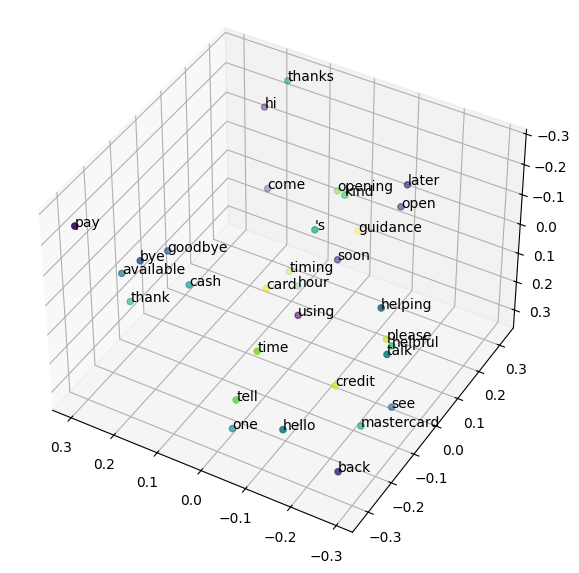

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1, projection='3d')

ax.scatter(vf['x'], vf['y'], vf['z'], cmap='viridis', c=range(len(vf.index)))

for i, word in enumerate(vf.index):
    ax.text(vf['x'][i], vf['y'][i], vf['z'][i], word)

ax.view_init(-140, 60)

plt.show()


In [ ]:
cosine_similarity(
    model.wv['hello'].reshape(1,-1),
    model.wv['back'].reshape(1,-1)
)

array([[0.9696003]], dtype=float32)

In [ ]:
cosine_similarity(
    model.wv['hello'].reshape(1,-1),
    model.wv['available'].reshape(1,-1)
)

array([[0.15844041]], dtype=float32)

In [ ]:
model.wv.doesnt_match(['hello', 'back', 'available', 'one', 'tell'])

'available'

In [ ]:
import plotly.express as px
fig = px.scatter_3d(vf, x='x', y='y', z='z', color=vf.index, hover_name=vf.index, text=vf.index)
fig.show()

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
    Type: GloVe
</div>

